In [1]:
## Data manipulation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# Import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset

data = pd.read_csv('/content/drive/MyDrive/antenna/EMW_LAB - Sheet1 (1).csv')

In [4]:
data.head()

,a (initial radius),b (Spiral growth rate),thc (Spiral shape thickness),th_0 (Spiral's start angle),th_f (Spiral's end angle),th_m (Metal thickness),r (Substrate radius),hs (Substrate height),er (Substrate dielectric constant),f (freq) GHz,gain,s11,VSWR
0,0.75,1.5,1.5,0,7*pi,0.035,40,1.524,3.38,1.500000,3.201206,-1.70641,10.21305
1,0.75,1.5,1.5,0,7*pi,0.035,40,1.524,3.38,1.501251,3.190456,-1.71642,10.15430
2,0.75,1.5,1.5,0,7*pi,0.035,40,1.524,3.38,1.502501,3.179839,-1.71851,10.14156
3,0.75,1.5,1.5,0,7*pi,0.035,40,1.524,3.38,1.503752,3.169353,-1.71346,10.17107
4,0.75,1.5,1.5,0,7*pi,0.035,40,1.524,3.38,1.505003,3.158997,-1.70204,10.23910


# Data Cleaning

In [5]:
# Function to convert pi-based expressions to numeric values
def convert_pi_expression(value):
    if isinstance(value, str) and 'pi' in value:
        # Split the string at 'pi' and handle cases like '1*pi' or '4*pi'
        multiplier = value.split('*')[0]
        if multiplier == '':
            return np.pi  # Handle cases where it's just 'pi'
        else:
            return float(multiplier) * np.pi
    elif isinstance(value, (int, float)):
        return value  # Already numeric
    else:
        return np.nan  # Handle unexpected cases

# Apply the conversion to the relevant columns
data['th_0 (Spiral\'s start angle)'] = data['th_0 (Spiral\'s start angle)'].apply(convert_pi_expression)
data['th_f (Spiral\'s end angle)'] = data['th_f (Spiral\'s end angle)'].apply(convert_pi_expression)

# Check if the conversion worked
print(data[['th_0 (Spiral\'s start angle)', 'th_f (Spiral\'s end angle)']].head())

   th_0 (Spiral's start angle)  th_f (Spiral's end angle)
0                          NaN                  21.991149
1                          NaN                  21.991149
2                          NaN                  21.991149
3                          NaN                  21.991149
4                          NaN                  21.991149


In [6]:
# Remove duplicate rows
data = data.drop_duplicates()
print(f"Data after removing duplicates: {data.shape}")

Data after removing duplicates: (10980, 13)


In [7]:
# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())

Missing values in the dataset:
 a (initial radius)                       0
b (Spiral growth rate)                   0
thc (Spiral shape thickness)             0
th_0 (Spiral's start angle)           2000
th_f (Spiral's end angle)                0
th_m (Metal thickness)                   0
r (Substrate radius)                     0
hs (Substrate height)                    0
er (Substrate dielectric constant)       0
f (freq) GHz                             0
gain                                     0
s11                                      0
VSWR                                     0
dtype: int64


In [8]:
# Handling missing values
# We will use mean imputation for numerical columns as a simple imputation strategy
!pip install scikit-learn -q

In [9]:
from sklearn.impute import SimpleImputer # Import the SimpleImputer class
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)

print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 a (initial radius)                    0
b (Spiral growth rate)                0
thc (Spiral shape thickness)          0
th_0 (Spiral's start angle)           0
th_f (Spiral's end angle)             0
th_m (Metal thickness)                0
r (Substrate radius)                  0
hs (Substrate height)                 0
er (Substrate dielectric constant)    0
f (freq) GHz                          0
gain                                  0
s11                                   0
VSWR                                  0
dtype: int64


# Exploratory Data Analysis (EDA)

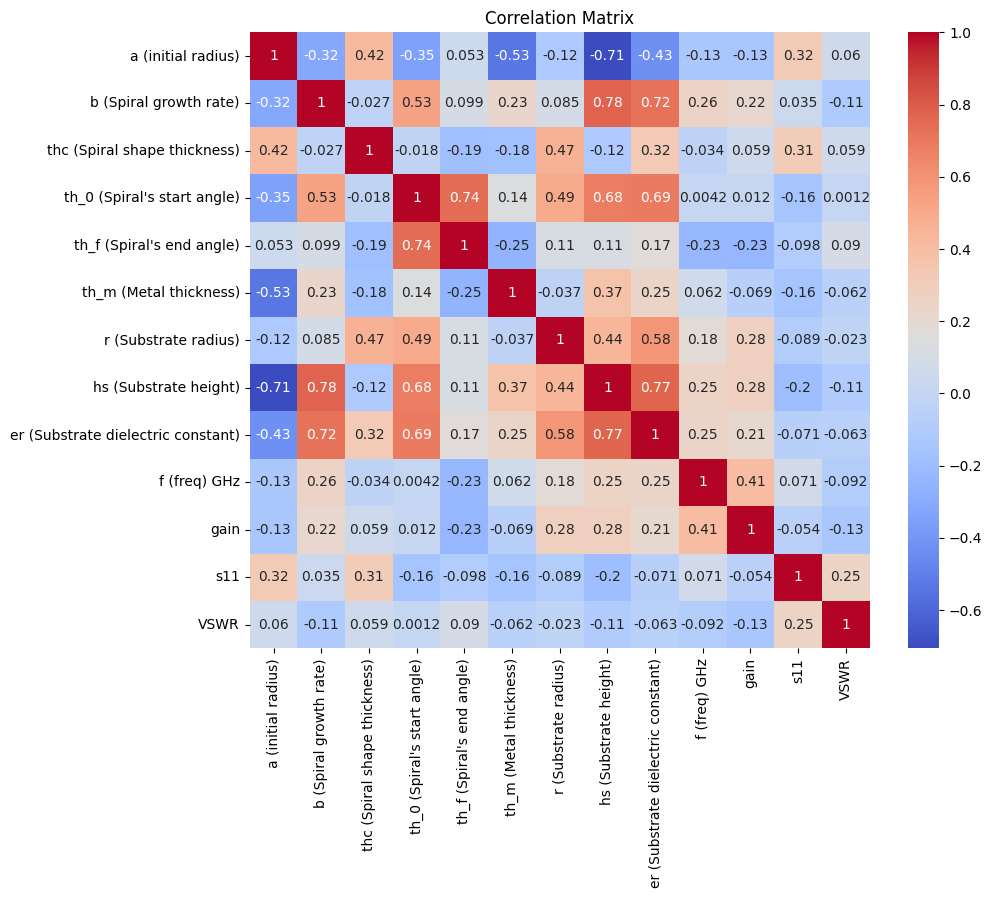

In [10]:
# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
# 2. Distribution Fitting and Outlier Removal

def remove_outliers(df, col_name):
    """Remove outliers based on z-score."""
    z_scores = np.abs(stats.zscore(df[col_name]))
    filtered_entries = z_scores < 3  # Define outliers as values beyond 3 standard deviations
    return df[filtered_entries]

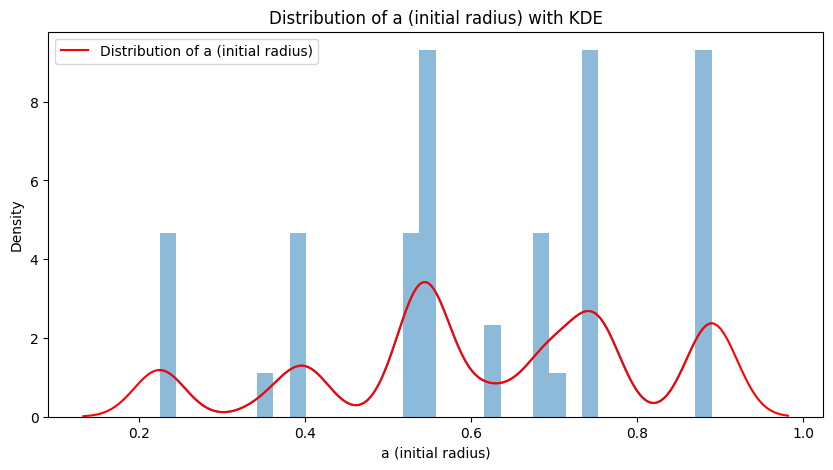

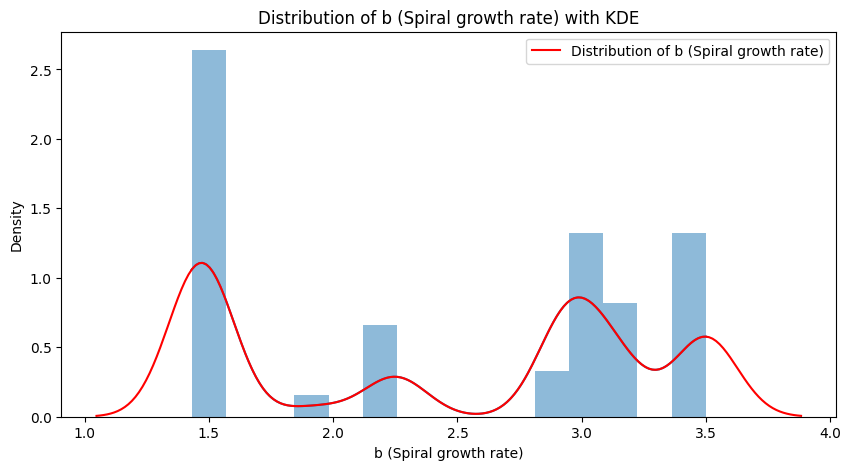

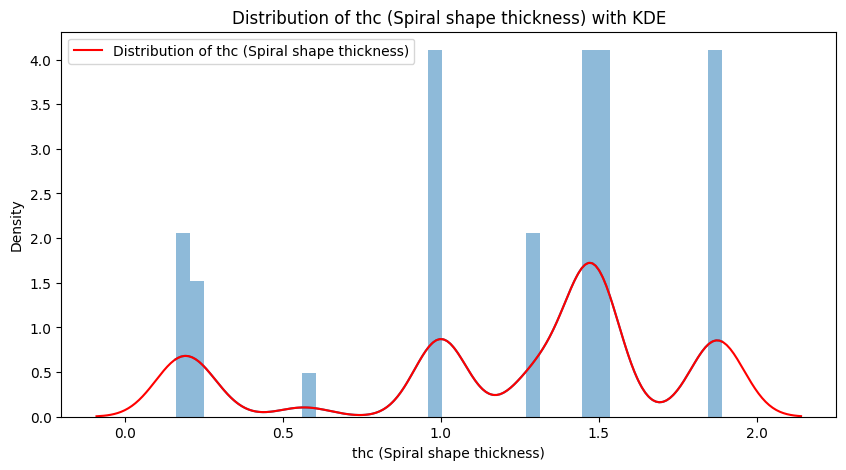

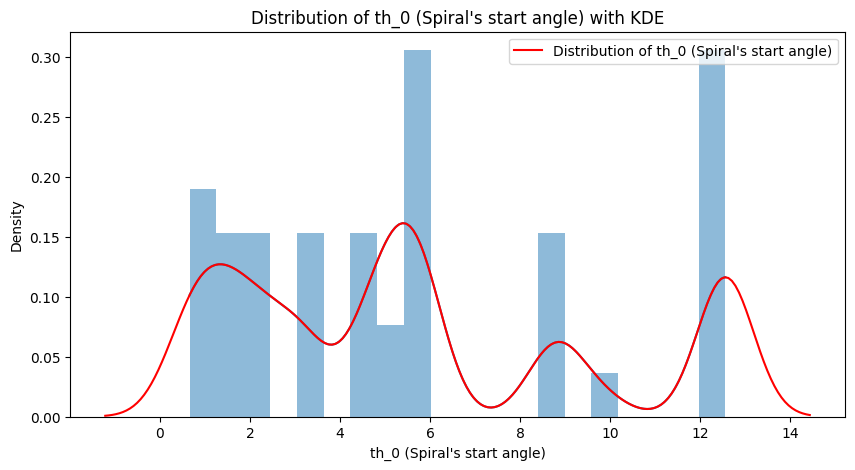

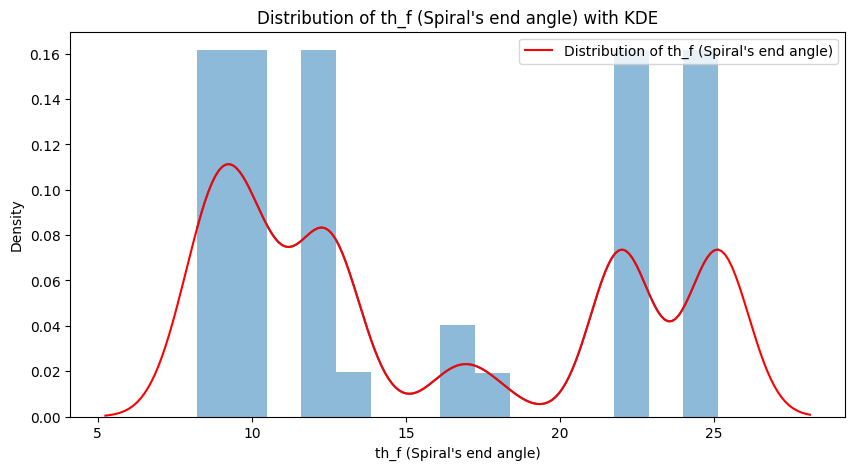

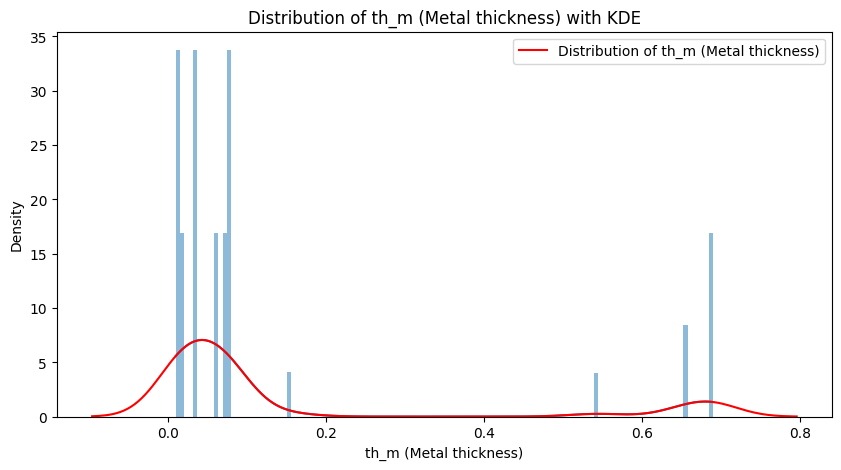

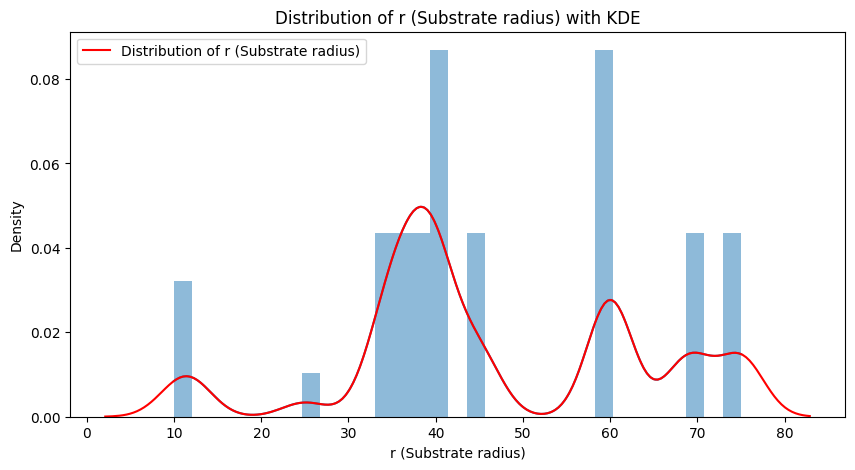

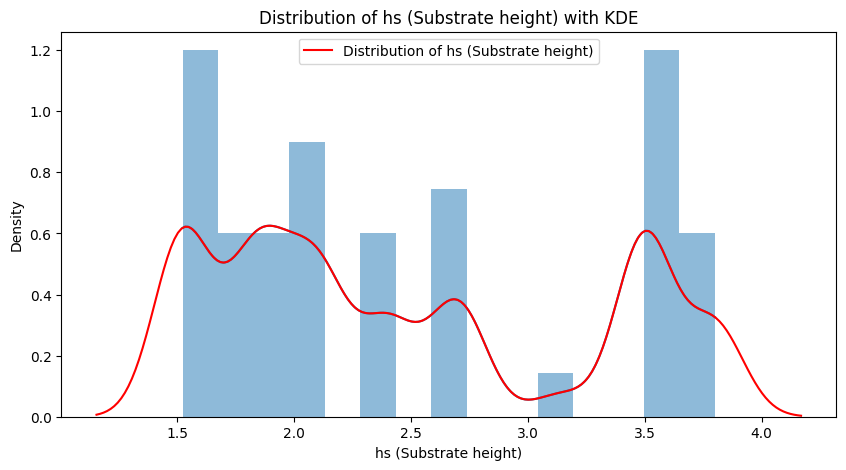

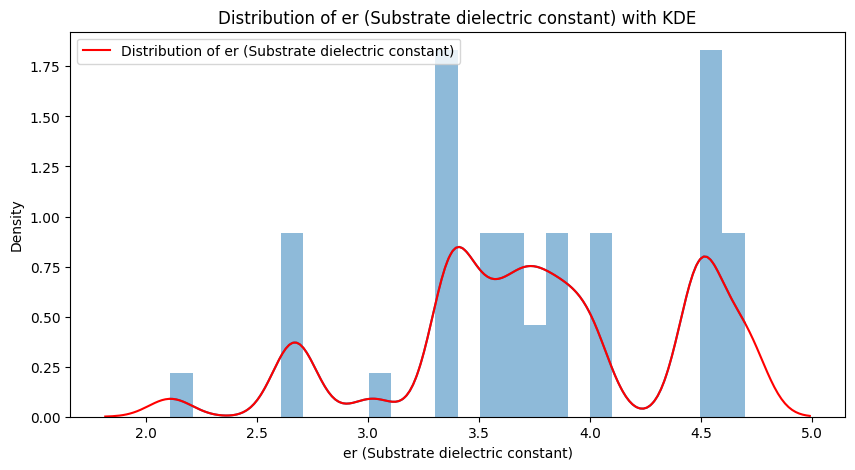

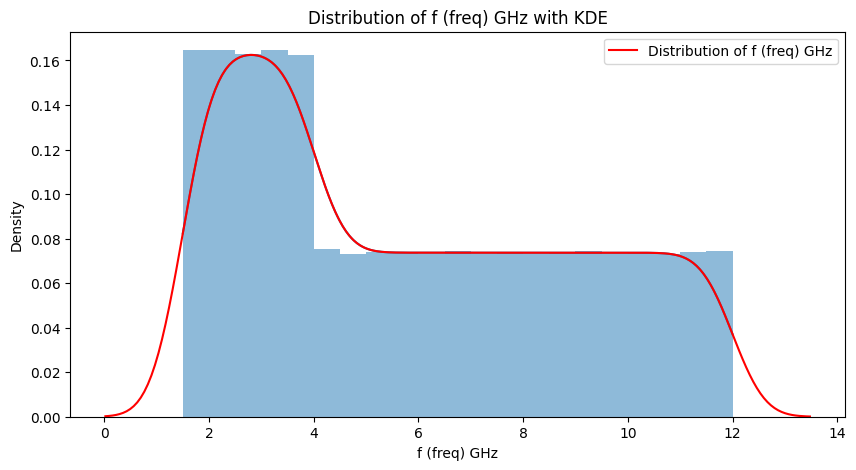

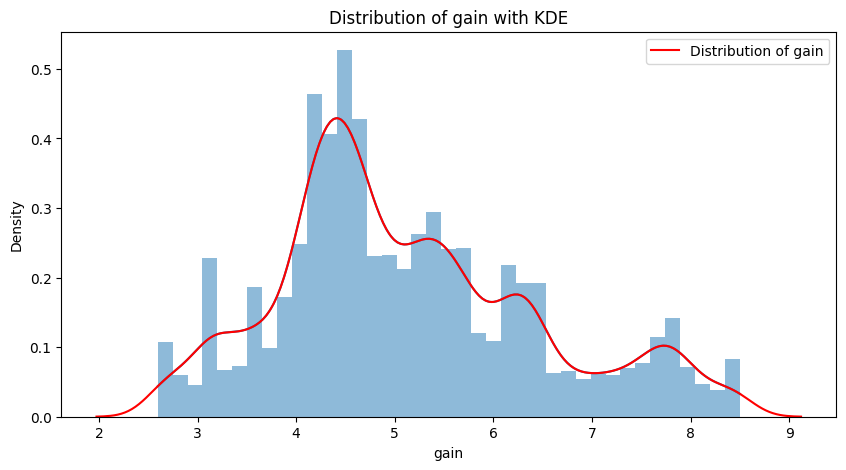

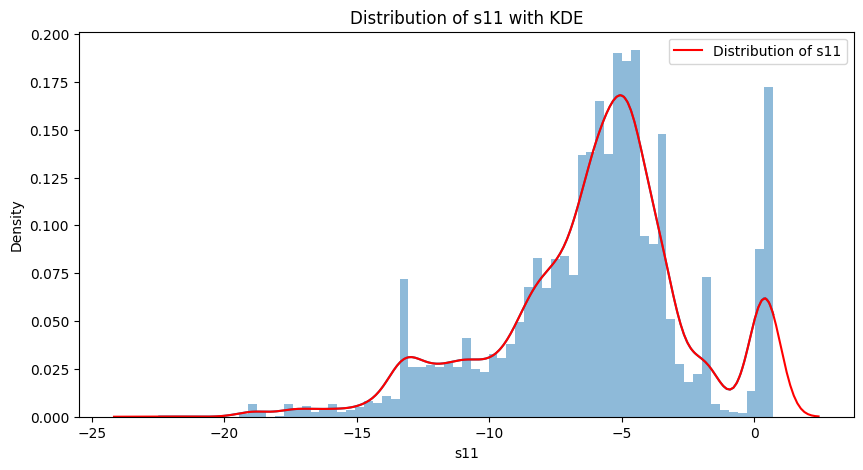

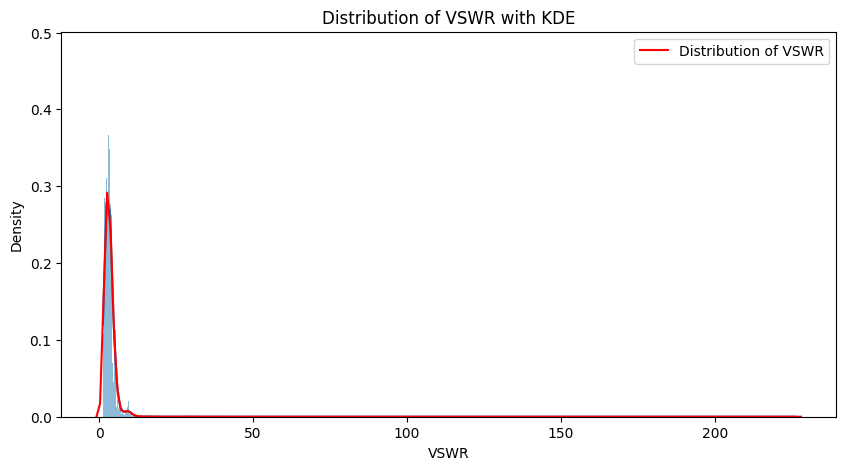

In [12]:
# Distribution fitting and outlier removal for each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, stat="density", linewidth=0)
    sns.kdeplot(data[col], color="r", label=f"Distribution of {col}")
    plt.title(f"Distribution of {col} with KDE")
    plt.legend()
    plt.show()

    # Remove outliers using z-score
    data = remove_outliers(data, col)

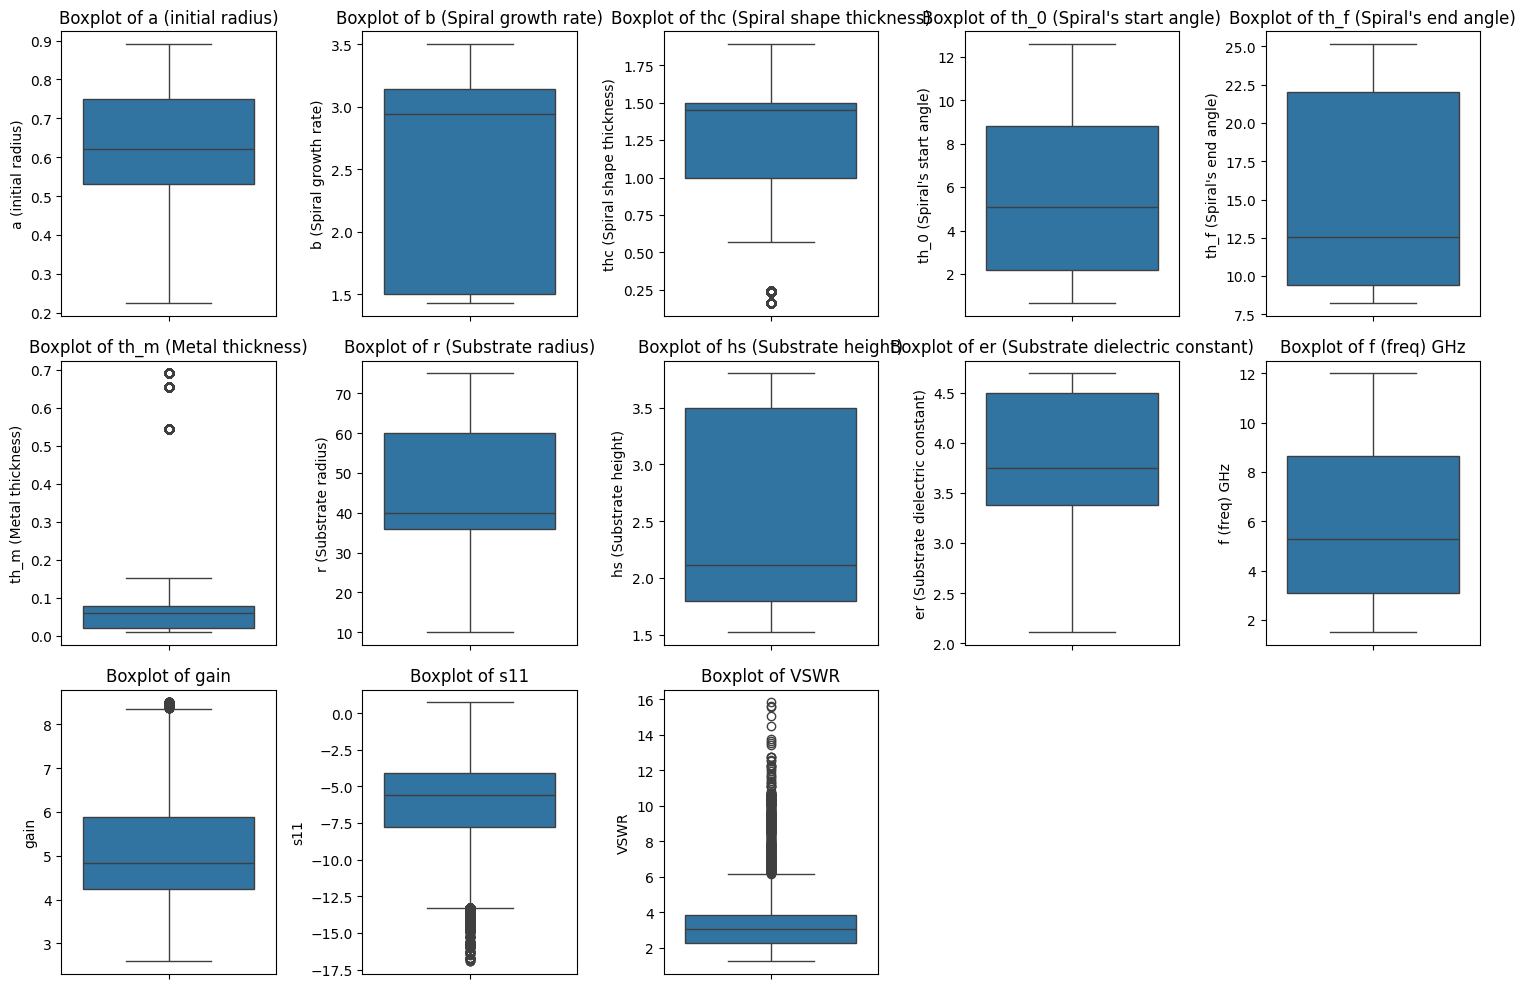

In [13]:
# 3. Boxplots for Visualizing Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [14]:
# 2. Distribution Fitting and Outlier Removal

def remove_outliers(df, col_name):
    """Remove outliers based on z-score."""
    z_scores = np.abs(stats.zscore(df[col_name]))
    filtered_entries = z_scores < 3  # Define outliers as values beyond 3 standard deviations
    return df[filtered_entries]

# Remove outliers from the entire dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data = remove_outliers(data, col)

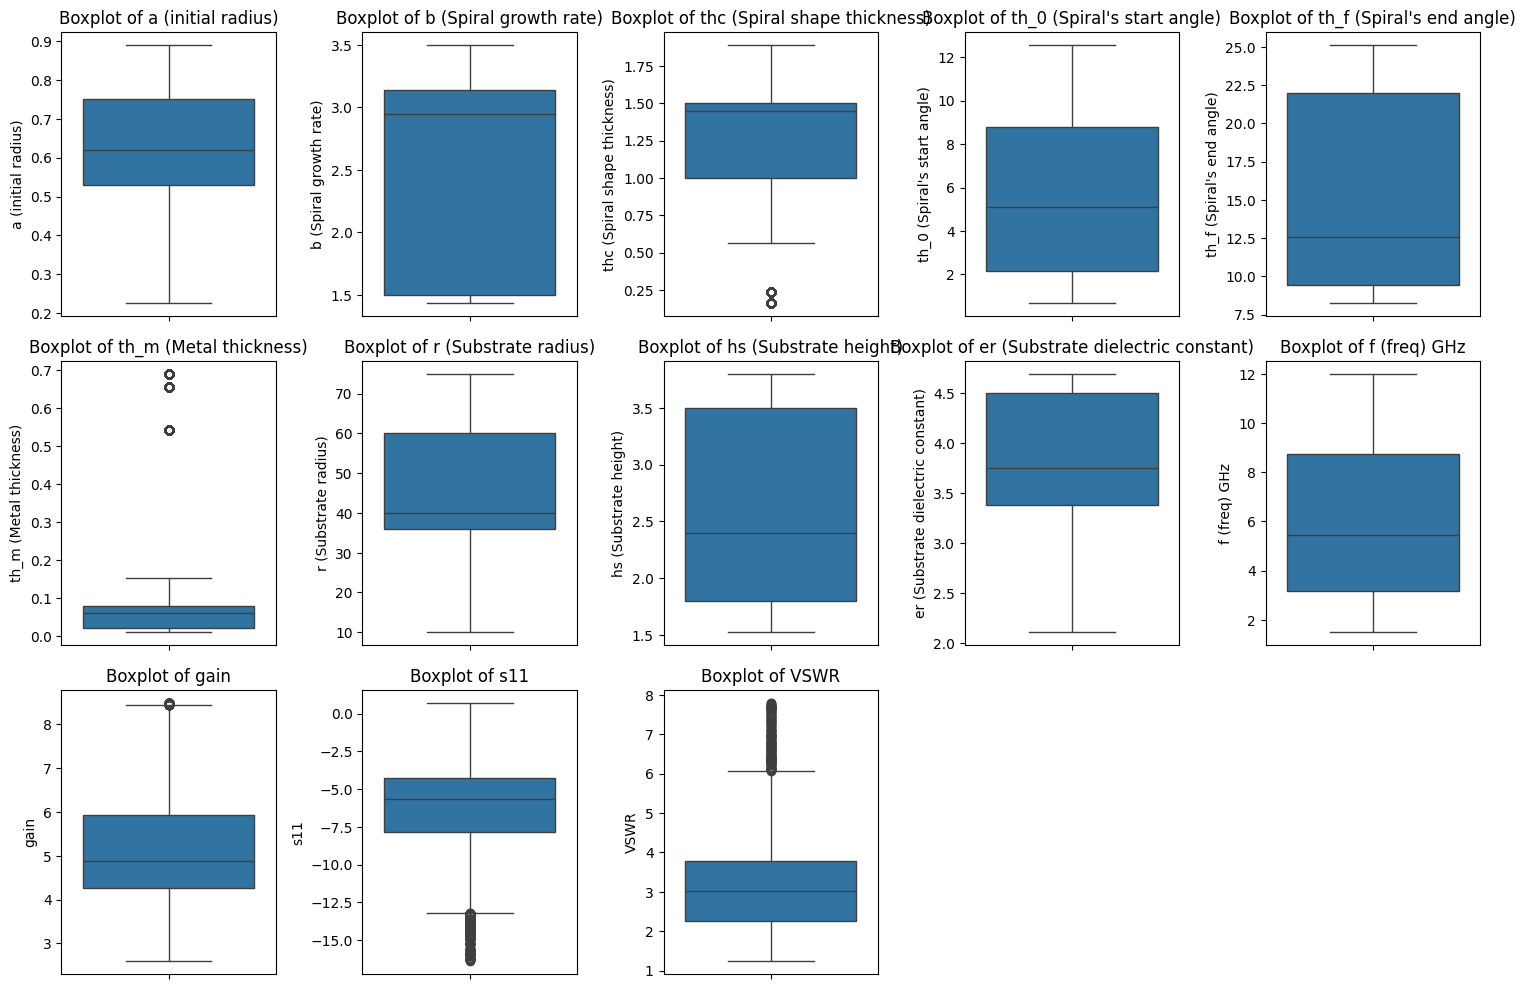

In [15]:
# 3. Boxplots for Visualizing Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [16]:
data.shape

(10588, 13)

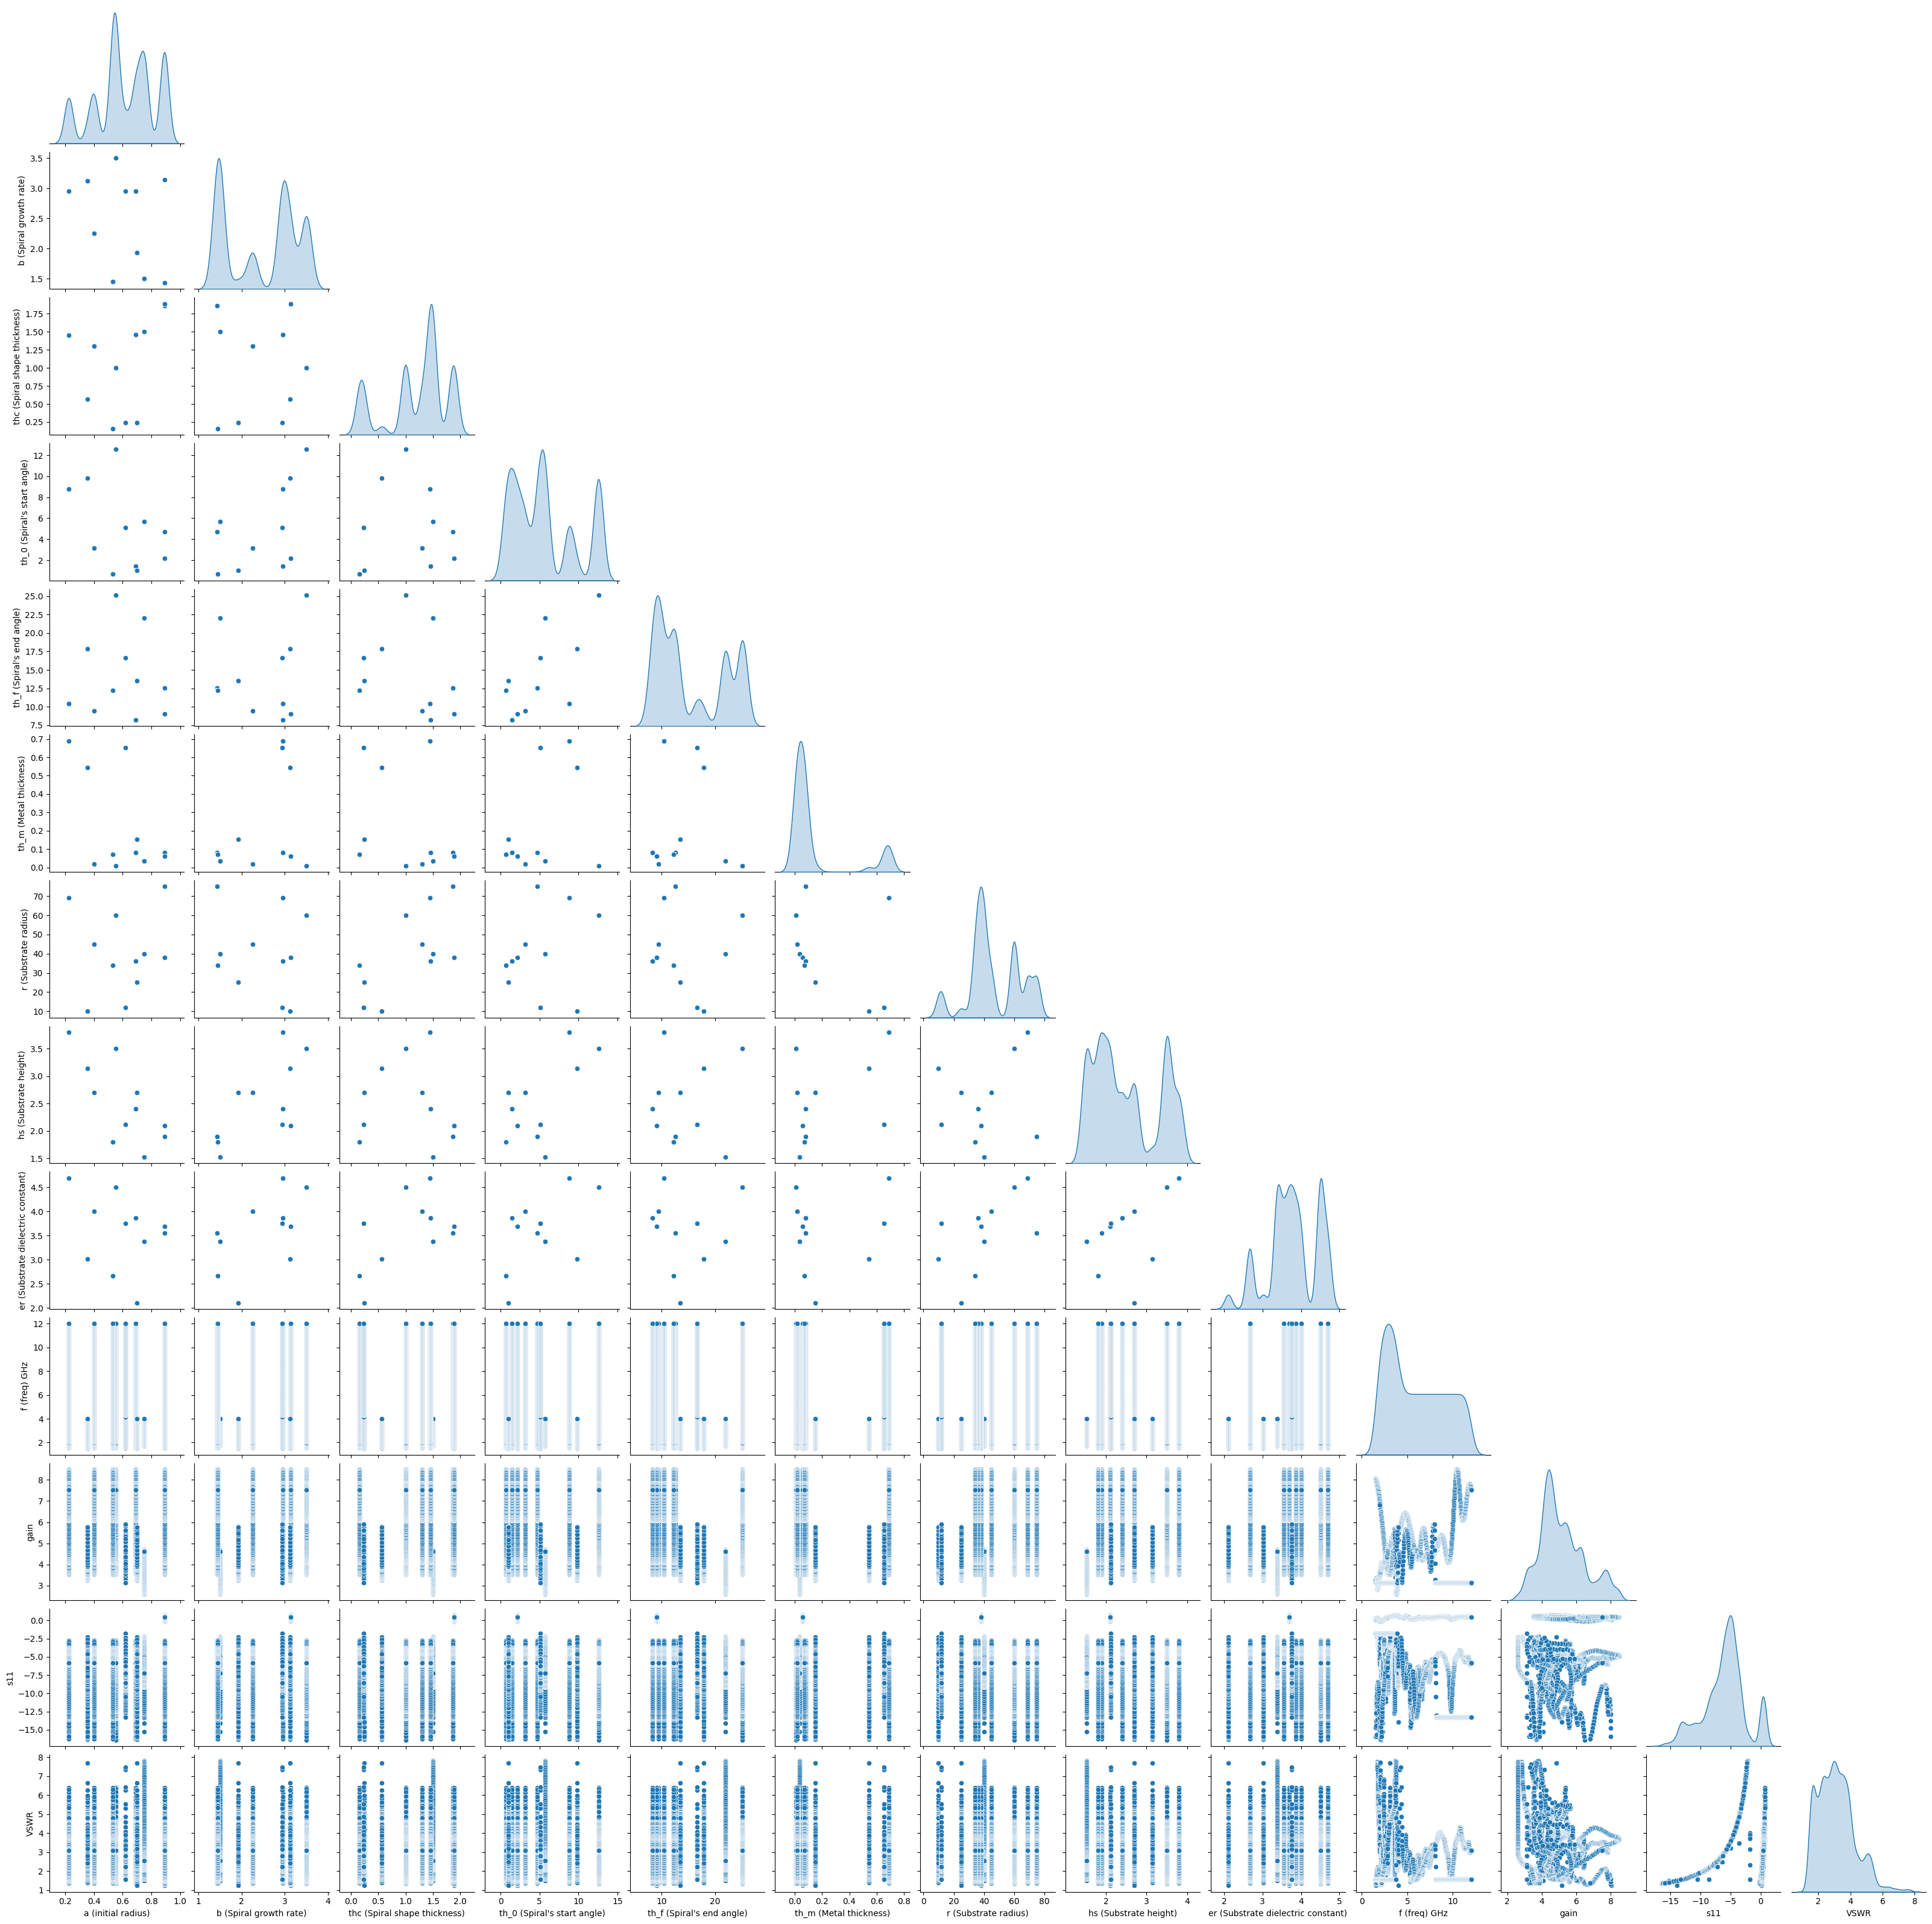

In [17]:
# 4. Pair Plot for Multivariate Relationships
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

# Data Preprocessing

In [18]:
# Define features (X) and target (y)
X = data.drop(columns=['gain'])
y = data['gain']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
!pip uninstall lazypredict -y
!pip install git+https://github.com/shankarpandala/lazypredict.git


Found existing installation: lazypredict 0.2.12
Uninstalling lazypredict-0.2.12:
  Successfully uninstalled lazypredict-0.2.12
  Cloning https://github.com/shankarpandala/lazypredict.git to /tmp/pip-req-build-53yzvcml
  Running command git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-53yzvcml
  Resolved https://github.com/shankarpandala/lazypredict.git to commit 4529b96e09fad6a0935c45c7060cfe3d51cfdf90
  Preparing metadata (setup.py) ... done
  Created wheel for lazypredict: filename=lazypredict-0.2.12-py2.py3-none-any.whl size=12326 sha256=e17aca775a5f3fc6f229c07d45f0316f244508793b37274266c3da31acb44439
  Stored in directory: /tmp/pip-ephem-wheel-cache-xqq5aqur/wheels/c1/0d/a5/13b226e20f8f57f2b4f456375f6993b30f7900d29d6609ff4f
Successfully built lazypredict


In [20]:
from lazypredict.Supervised import LazyRegressor

# Apply Lazy Predict to find the best algorithm
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display the comparison of models
print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [02:00<00:00,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 8470, number of used features: 12
[LightGBM] [Info] Start training from score 5.160262
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          1.00       1.00  0.02        7.42
DecisionTreeRegressor                        1.00       1.00  0.02        0.18
RandomForestRegressor                        1.00       1.00  0.03        5.20
BaggingRegressor                             1.00       1.00  0.04        0.80
XGBRegressor                                 1.00       1.00  0.04        0.30
HistGradientBoostingRegressor              

In [24]:
# Filtering out models to identify non-overfitting models
# You can adjust the thresholds based on your dataset
non_overfitting_models = models[
    (models['Adjusted R-Squared'] > 0.7) &            # Adjust threshold for acceptable R-Squared
    (models['RMSE'] < models['RMSE'].quantile(0.75))  # Lower 25% of RMSE as a filter
]

# Sort the filtered models by R-Squared
non_overfitting_models = non_overfitting_models.sort_values(by='Adjusted R-Squared', ascending=False)

# Display the non-overfitting models
print("Non-Overfitting Models:")
print(non_overfitting_models[['Adjusted R-Squared', 'R-Squared', 'RMSE']]) # Removed 'Model' as it was not found.

Non-Overfitting Models:
                               Adjusted R-Squared  R-Squared  RMSE
Model                                                             
ExtraTreesRegressor                          1.00       1.00  0.02
DecisionTreeRegressor                        1.00       1.00  0.02
RandomForestRegressor                        1.00       1.00  0.03
BaggingRegressor                             1.00       1.00  0.04
XGBRegressor                                 1.00       1.00  0.04
HistGradientBoostingRegressor                1.00       1.00  0.07
LGBMRegressor                                1.00       1.00  0.07
ExtraTreeRegressor                           1.00       1.00  0.08
KNeighborsRegressor                          0.96       0.96  0.25
GradientBoostingRegressor                    0.95       0.95  0.30
MLPRegressor                                 0.80       0.80  0.57
AdaBoostRegressor                            0.75       0.75  0.64


In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define a function for cross-validation and hyperparameter tuning
def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best parameters and       score
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)

    return best_params, rmse, r_squared

# Split your data (X, y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.fit_transform(X)

# Define hyperparameter grids for each model
param_grids = {
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'MLPRegressor': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    },
    'AdaBoostRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

# Initialize a dictionary to store results
results = {}

# Evaluate each model with GridSearchCV
for model_name, model in zip(['KNeighborsRegressor', 'GradientBoostingRegressor', 'MLPRegressor', 'AdaBoostRegressor'],
                              [KNeighborsRegressor(), GradientBoostingRegressor(), MLPRegressor(), AdaBoostRegressor()]):
    print(f"Tuning {model_name}...")
    param_grid = param_grids[model_name]
    best_params, rmse, r_squared = tune_and_evaluate_model(model, param_grid, X_train_scaled, y_train, X_test_scaled, y_test)

    # Store results
    results[model_name] = {
        'Best Parameters': best_params,
        'RMSE': rmse,
        'R-Squared': r_squared
    }
    print(f"{model_name} Results:")
    print(f"Best Parameters: {best_params}")
    print(f"RMSE: {rmse:.4f}, R-Squared: {r_squared:.4f}\n")

# Display all results
results_df = pd.DataFrame(results).T
print("Summary of Results:")
print(results_df)

Tuning KNeighborsRegressor...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
KNeighborsRegressor Results:
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
RMSE: 0.1860, R-Squared: 0.9793

Tuning GradientBoostingRegressor...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
GradientBoostingRegressor Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 0.0315, R-Squared: 0.9994

Tuning MLPRegressor...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPRegressor Results:
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
RMSE: 0.3604, R-Squared: 0.9222

Tuning AdaBoostRegressor...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoostRegressor Results:
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
RMSE: 0.6187, R-Squared: 0.7707

Summary of Resul